In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split
from plotData import *
from mapFeature import *
from costFunctionReg import *
from plotDecisionBoundary import *
from predict import *

# REGULARIZED LOGISTIC REGRESSION

In [3]:
data=pd.read_csv('data_reg-logistic.txt',sep=',',header=None)
data.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [4]:
data.describe()

,0,1,2
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


In [5]:
X,y=np.column_stack((np.ones(data.shape[0]),data.values[:,:2])),data.values[:,-1][:,np.newaxis]

## VISUALIZE DATA

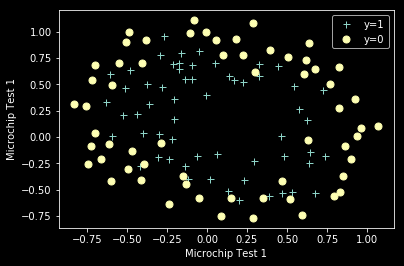

In [6]:
plotData(X,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 1')
plt.legend(['y=1','y=0'])

## FEATURE MAPPING

In [7]:
degree=6
X_of=mapFeature(X[:,1],X[:,2],degree)

## COST FUNCTION AND GRADIENT

In [8]:
theta_ini=np.zeros(X_of.shape[1])
reglambda=1
J_ini,grad_ini=costFunctionReg(theta_ini,X_of,y,reglambda)
print('Cost at initial theta (zeros):',J_ini)

Cost at initial theta (zeros): 0.6931471805599453


## DECISION BOUNDARY

In [9]:
res=optimize.minimize(costFunctionReg,theta_ini,args=(X_of,y,reglambda),method='Newton-CG',jac=True,options={'maxiter':1000})
res

     fun: 0.5290027297136001
     jac: array([ 1.68303260e-06, -5.98915904e-08,  2.27227223e-07, -4.49898064e-08,
       -1.39580698e-07, -6.77272231e-08, -4.57111555e-08,  4.79697887e-08,
       -6.51780976e-10, -7.67951149e-08,  3.78157982e-08, -1.85159233e-08,
        3.55442218e-08, -4.12198761e-08,  1.13819070e-07, -7.49618953e-10,
        2.21559136e-09, -1.08346621e-08,  8.80468963e-09, -2.24225444e-08,
       -5.51775805e-10,  3.62746109e-08, -1.25884094e-08,  8.74550701e-09,
       -1.21583884e-09,  7.44231577e-10, -1.53782552e-08,  8.43277553e-08])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 92
  status: 0
 success: True
       x: array([ 1.27274376,  0.62527287,  1.18108996, -2.01996442, -0.91742122,
       -1.43166732,  0.12400524, -0.36553452, -0.35723884, -0.17513235,
       -1.45815723, -0.05098782, -0.61555557, -0.27470631, -1.19281916,
       -0.24218776, -0.20600607, -0.04473072, -0.27778445, -0.29537732,
       -0.4

In [10]:
J_fin=res.fun
theta_fin=res.x
J_fin

0.5290027297136001

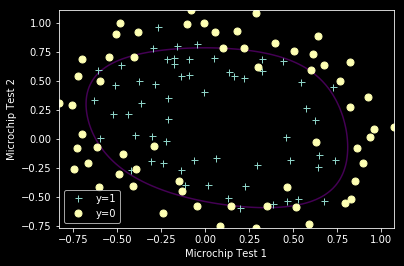

In [11]:
plotData(X,y)
plotDecisionBoundaryReg(theta_fin,X,degree)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y=1','y=0'])

In [12]:
_,p=predict(theta_fin,X_of)
print('Train Accuracy:',np.mean(p==y))
np.mean(predict(theta_fin,X_of)[1]==y)

Train Accuracy: 0.8305084745762712


0.8305084745762712

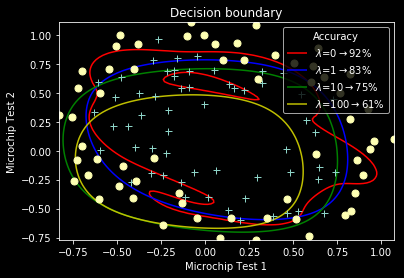

In [13]:
plotData(X,y)
reglambda=np.array([0,1,10,100])
colors=np.array(['r','b','g','y'])
p=np.zeros_like(reglambda)
lines=[]
labels=[]
for i,ilambda in enumerate(reglambda):
    res=optimize.minimize(costFunctionReg,theta_ini,args=(X_of,y,ilambda),method='BFGS',jac=True,options={'maxiter':1000})
    theta_fin=res.x
    cs=plotDecisionBoundaryReg(theta_fin,X,degree,colors=colors[i])
    lines.append(cs.collections[0])
    labels.append('$\lambda$='+str(ilambda)+r'$\rightarrow$'+str('%.0f' % (100*np.mean(predict(theta_fin,X_of)[1]==y)))+'%')
    

plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(lines,labels,title='Accuracy',loc='upper right')
plt.title('Decision boundary')
#plt.legend(['y=1','y=0'])
plt.savefig('regularization-parameter.png')

## ADVANCED OPTIMIZATION ALGORITHMS

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X_of[:,1:],y,test_size=0.5)

In [15]:
def multiRegLogReg(X_train,y_train,X_test,y_test):
    plotData(X,y)
    reglambda=np.array([0.00001,1,10,100])
    colors=np.array(['r','b','g','y'])
    lines=[]
    labels=[]
    for i,ilambda in enumerate(reglambda):
        clf=LogisticRegression(C=1/ilambda,solver='newton-cg')
        clf.fit(X_train,np.ravel(y_train))
        theta=np.hstack((clf.intercept_,np.ravel(clf.coef_)))
        cs=plotDecisionBoundaryReg(theta,X,degree,colors=colors[i])
        lines.append(cs.collections[0])
        labels.append('$\lambda$='+str('%.0f' % ilambda)+r'$\rightarrow$'+str('%.0f' % (100*clf.score(X_test,y_test)))+'%')

    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(lines,labels,title='Accuracy',loc='upper right')
    plt.title('Decision boundary')

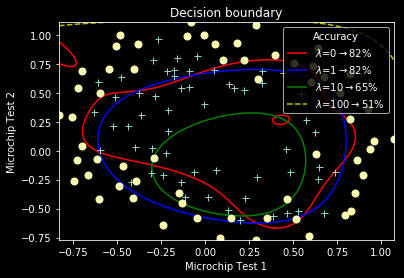

In [16]:
multiRegLogReg(X_train,y_train,X_of[:,1:],y)

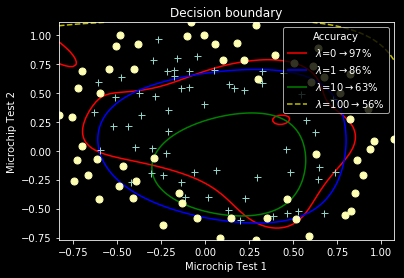

In [17]:
multiRegLogReg(X_train,y_train,X_train,y_train)

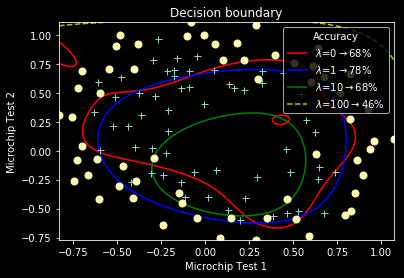

In [18]:
multiRegLogReg(X_train,y_train,X_test,y_test)